In [1]:
import pandas as pd
import numpy as np
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
from plotly.graph_objs import Scatter, Figure, Layout, Histogram
init_notebook_mode(connected=True)
np.random.seed(68)
%matplotlib inline

In [2]:
df = pd.read_csv("performances2.csv")

In [3]:
df.head()

,optim,n_functions,time,n_relations,size_max
0,0,1,0.021501,10,10
1,1,1,0.021263,10,10
2,2,1,0.023237,10,10
3,3,1,0.019265,10,10
4,0,2,0.083337,10,10


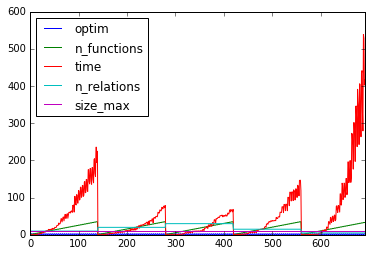

In [4]:
df.plot()

In [22]:
df_0 = df[(df["optim"] == 0)].groupby(by="n_functions").agg(np.mean)
df_1 = df[(df["optim"] == 1)].groupby(by="n_functions").agg(np.mean)
df_2 = df[(df["optim"] == 2)].groupby(by="n_functions").agg(np.mean)
df_3 = df[(df["optim"] == 3)].groupby(by="n_functions").agg(np.mean)

In [23]:
df_0 = df_0[df_0.index <= 33]
df_1 = df_1[df_1.index <= 33]
df_2 = df_2[df_2.index <= 33]
df_3 = df_3[df_3.index <= 33]

In [24]:
data0 = Scatter(x=df_0.index, y=df_0.time, name='Without Rule Order Optimization')
data1 = Scatter(x=df_1.index, y=df_1.time, name='With Reverse Order')
data2 = Scatter(x=df_2.index, y=df_2.time, name='With Rule Core Number Ordering')
data3 = Scatter(x=df_3.index, y=df_3.time, name='With Reverse Rule Core Number Ordering')

In [37]:
layout = Layout(
  #  title='Comparisation Performance With Rule Order Optimization',
    font=dict(family='Latin Modern Math', size=6*3),
    xaxis=dict(
        title='Number of Functions',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    yaxis=dict(
        title='Time of Computation (in s)',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    legend=dict(x=0, y=1)
)
fig = Figure(data=[data0, data1, data2, data3], layout=layout)
iplot(fig)

In [8]:
data3 = Scatter(x=df_0.index, y=(np.array(df_0.time)-np.array(df_2.time)))

In [9]:
iplot([data3])

In [10]:
dt = (np.array(df_0.time)-np.array(df_2.time))

In [11]:
window_size = 5
dt_smooth = []

In [12]:
for i in range(len(dt) - window_size):
    dt_smooth.append(dt[i:i+5].mean())

In [13]:
data4 = Scatter(x=np.array(range(len(dt_smooth))), y=dt_smooth)

In [14]:
iplot([data4])

In [15]:
df05 = df[(df["n_relations"] == 5)].groupby(by="n_functions").agg(np.mean)
df10 = df[(df["n_relations"] == 10)].groupby(by="n_functions").agg(np.mean)
df15 = df[(df["n_relations"] == 15)].groupby(by="n_functions").agg(np.mean)
df20 = df[(df["n_relations"] == 20)].groupby(by="n_functions").agg(np.mean)
df30 = df[(df["n_relations"] == 30)].groupby(by="n_functions").agg(np.mean)

In [16]:
data05 = Scatter(x=df05.index, y=df05.time, name="With 5 Relations")
data10 = Scatter(x=df10.index, y=df10.time, name="With 10 Relations")
data15 = Scatter(x=df15.index, y=df15.time, name="With 15 Relations")
data20 = Scatter(x=df20.index, y=df20.time, name="With 20 Relations")
data30 = Scatter(x=df30.index, y=df30.time, name="With 30 Relations")

In [38]:
layout = Layout(
    # title='Comparisation Performance With the Total Number of Relations',
    font=dict(family='Latin Modern Math', size=6*3),
    xaxis=dict(
        title='Number of Functions',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=False,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    yaxis=dict(
        title='Time of Computation (in s)',
        autorange=True,
        showgrid=False,
        zeroline=True,
        showline=True,
        autotick=True,
        ticks='',
        showticklabels=True
    ),
    legend=dict(x=0, y=1)
)
fig = Figure(data=[data05, data10, data15, data20, data30], layout=layout)
iplot(fig)